# TP 1 : Méthodes de Signal Avancées Annulation d’Écho Acoustique

In [190]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np

## I. Implémentation de l'algorithme LMS

### I.1 Générations de signaux tests

In [191]:

ROOT = Path.cwd().parents[0]
sys.path.append(str(ROOT / "src"))


import signals_utils

reload(signals_utils)
from signals_utils import generate_test_signals


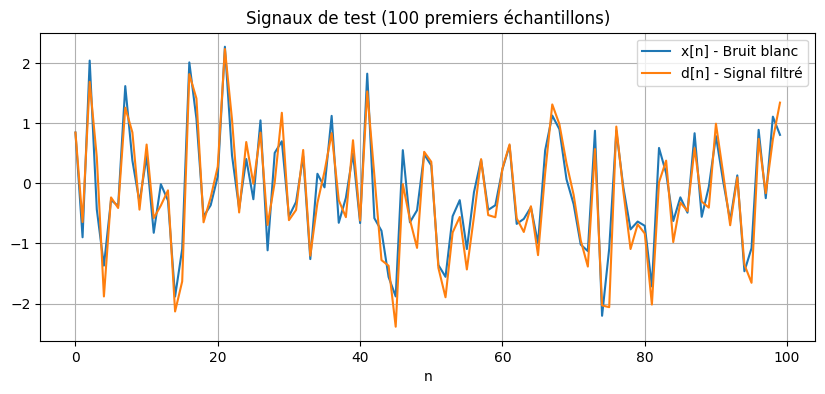

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]


In [192]:
# Génération des signaux
x, d, h = generate_test_signals(N=500, variance = 1)

# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(x[:100], label="x[n] - Bruit blanc")
plt.plot(d[:100], label="d[n] - Signal filtré")
plt.title("Signaux de test (100 premiers échantillons)")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h)

### I.2 Validation de l'algorithme LMS

In [193]:
ROOT = Path.cwd().parents[0]
sys.path.append(str(ROOT / "src"))

import algoms

reload(algoms)
from algoms import algoms

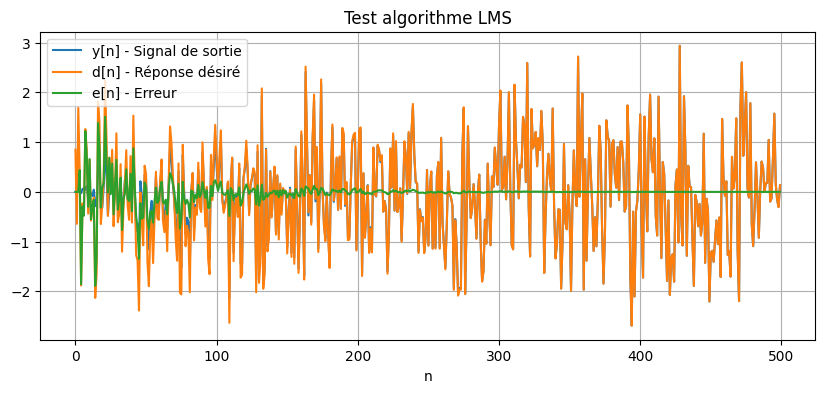

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]


In [194]:
P = len (h)
mu = 0.02
w, y, erreur = algoms(x, d, P, mu)


# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(y, label="y[n] - Signal de sortie")
plt.plot(d, label="d[n] - Réponse désiré")
plt.plot(erreur, label = "e[n] - Erreur")
plt.title("Test algorithme LMS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h)

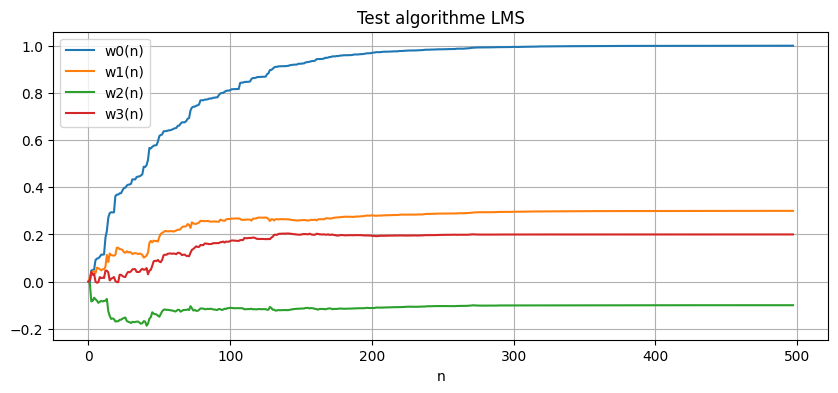

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]
W final obtenue : [ 0.99994023  0.29994812 -0.10001455  0.20000279]


In [195]:
W_tot = np.array(w, dtype=float)
N=497
plt.figure(figsize=(10, 4))
for p in range(P):
    # Visualisation

    plt.plot(W_tot[:, p], label=f"w{p}(n)")

plt.title("Test algorithme LMS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()
print("Réponse impulsionnelle utilisée :", h)
print("W final obtenue :", W_tot[N, :])

### I.3 Test de l'algorithme LMS

In [196]:
ROOT = Path.cwd().parents[0]
sys.path.append(str(ROOT / "src"))


import signals_utils

reload(signals_utils)
from signals_utils import generate_test_LMS_signals


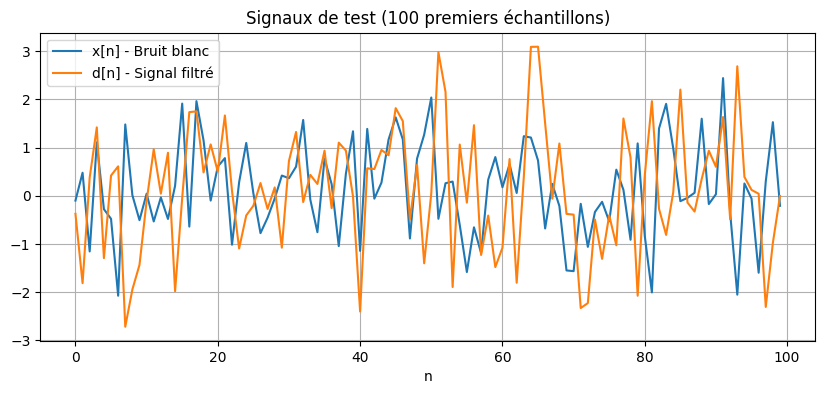

Réponse impulsionnelle utilisée : [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]


In [197]:
P_list = [5, 10, 20]
mu_list = [0.01, 0.1, 0.5]

x_list = []
d_final = []
h_tot = []

for i, P in enumerate(P_list):
    x, d, h = generate_test_LMS_signals(
        N=500,
        variance_x=1.0,
        noise_variance=1.0,
        P=P,
        frequency=0.5
    )
    x_list.append(x)
    d_final.append(d)
    h_tot.append(h)

# Visualisation du premier cas
plt.figure(figsize=(10, 4))
plt.plot(x_list[0][:100], label="x[n] - Bruit blanc")
plt.plot(d_final[0][:100], label="d[n] - Signal filtré")
plt.title("Signaux de test (100 premiers échantillons)")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h_tot[0])

In [198]:
w_tot_list, y_list, e_list = [], [], []
for P in P_list:
    x, d, h = generate_test_LMS_signals(N=500,
        variance_x=1.0,
        noise_variance=1.0,
        P=P,
        frequency=0.5
    )
    w_tot, y, e = algoms(x, d, P, mu=0.1)
    w_tot_list.append(w_tot)
    y_list.append(y)
    e_list.append(e)


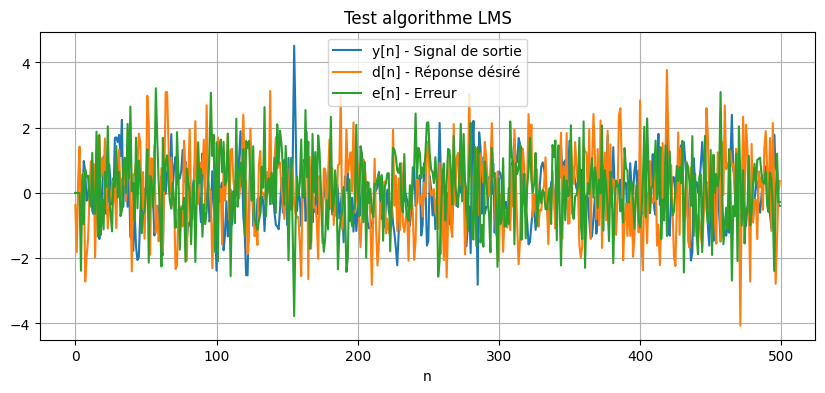

Réponse impulsionnelle utilisée : [1.84796815e-18 2.03712369e-01 5.92575262e-01 2.03712369e-01
 1.84796815e-18]


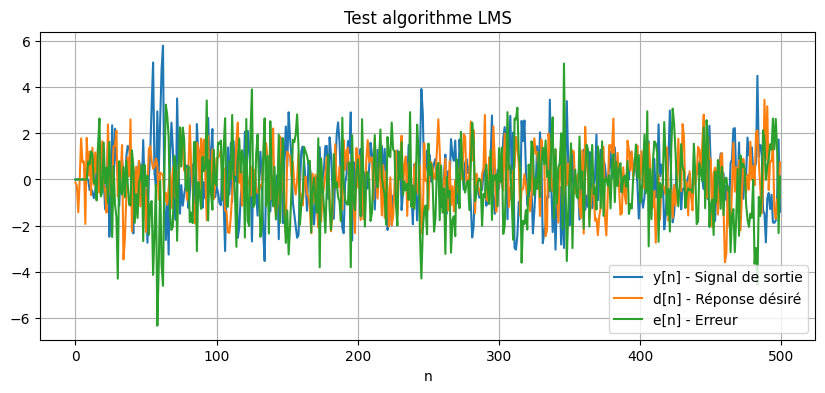

Réponse impulsionnelle utilisée : [ 0.00397185 -0.01197637 -0.0411195   0.11468706  0.43443695  0.43443695
  0.11468706 -0.0411195  -0.01197637  0.00397185]


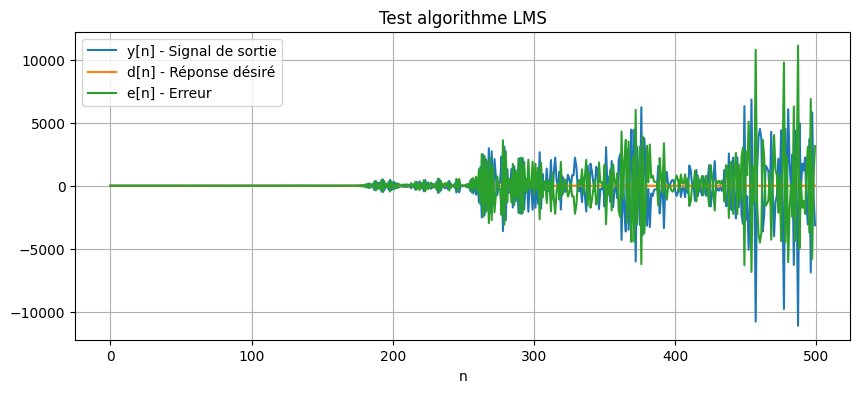

Réponse impulsionnelle utilisée : [ 0.00188953  0.00276977 -0.00529527 -0.00995578  0.01742331  0.02881991
 -0.04646496 -0.07642886  0.14129436  0.44594799  0.44594799  0.14129436
 -0.07642886 -0.04646496  0.02881991  0.01742331 -0.00995578 -0.00529527
  0.00276977  0.00188953]


In [200]:
for i in range(3) :
    # Visualisation
    plt.figure(figsize=(10, 4))
    plt.plot(y_list[i], label="y[n] - Signal de sortie")
    plt.plot(d_final[i], label="d[n] - Réponse désiré")
    plt.plot(e_list[i], label = "e[n] - Erreur")
    plt.title("Test algorithme LMS")
    plt.xlabel("n")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Réponse impulsionnelle utilisée :", h_tot[i])